## Module 1: Fundamentals of Forecasting


### 1.1 Why Forecast? Real-world Examples

- Inventory management, financial markets, energy load, weather, demand, classification (will it rain? will customer churn?)

> **Project kickoff:** Examine your own use case or pick one dataset below.

### 1.2 Types of Forecasting Problems

- **Time Series**: Data ordered in time (e.g., sales by day).
- **Cross-sectional (non-time-series)**: Data not ordered by time (e.g., predicting product demand for next month based on product features).
- **Panel Data**: Data with both time & other dimensions (e.g., sales by region over months).

### 1.3 Key Forecasting Tasks
- **Prediction/Regression:** Next day's sales (number).
- **Classification:** Will it rain (yes/no)?
- **Prescriptive:** How much to order?

### 1.4 Exploratory Data Analysis (EDA) for Forecasting

We'll use the classic Airline Passengers dataset.

In [1]:
# 1.4.1 Load Data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
# 1.4.2 Explore Data Types and Columns
print(df.dtypes)
print(df['Month'].head())

Month         object
Passengers     int64
dtype: object
0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object


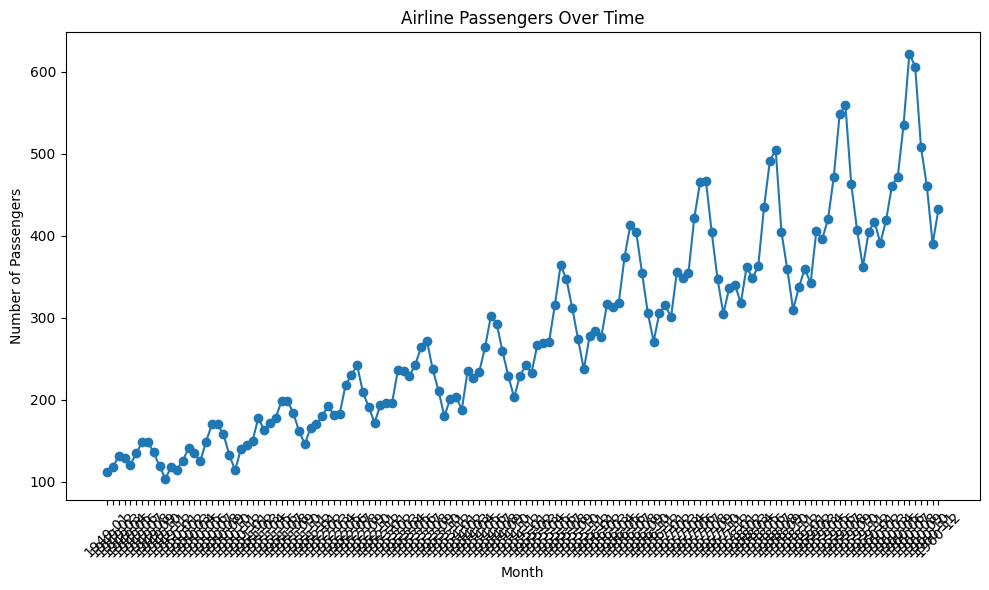

In [3]:
# 1.4.3 Visualize Time Series Data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Month'], df['Passengers'], marker='o')
plt.title("Airline Passengers Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.5 Characteristics of Forecasting Data
- **Univariate:** Just 1 variable (e.g. sales).
- **Multivariate:** Additional predictors (e.g. ad spend, holidays, weather).

### 1.6 Key Concepts
- Training/Validation/Test splits must respect time order (no shuffling for time series)
- Trends, seasonality, overfitting, underfitting

### 1.7 Mini Project: Explore a Dataset
- Load a dataset (like above)
- Plot and answer:
    - What are you forecasting?
    - Is your data time series?
    - Do you see trends or seasonality?
- (Optional) Save and share your notebook.

### 1.8 Next Up
- Basic mathematical forecasting methods (mean, naive, moving average, exponential smoothing...)

In [4]:
# Convert Month to datetime if not already done
df['Month'] = pd.to_datetime(df['Month'])
passengers = df['Passengers']

# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

# Generate comprehensive summary
print("=" * 60)
print("MINI PROJECT SUMMARY: AIRLINE PASSENGER FORECASTING")
print("=" * 60)

summary = f"""
DATA CHARACTERISTICS:
├─ Type: Univariate time series
├─ Frequency: Monthly (1949-1960)
├─ Observations: {len(df)}
├─ Time span: {df['Month'].min().strftime('%Y-%m')} to {df['Month'].max().strftime('%Y-%m')}
└─ No missing values

STATISTICAL PROPERTIES:
├─ Mean: {passengers.mean():.1f} passengers
├─ Range: {passengers.min():.0f} - {passengers.max():.0f}
├─ Growth rate: {((passengers.iloc[-1] / passengers.iloc[0]) - 1) * 100:.1f}% over period
└─ Volatility increases with level (suggests multiplicative model)

PATTERNS IDENTIFIED:
├─ TREND: Strong upward trend (growth from 1949 to 1960)
├─ SEASONALITY: Clear 12-month cycle with:
│  ├─ Peak months: July-August (summer travel)
│  ├─ Trough months: November-December
│  └─ Amplitude: {decomposition.seasonal.max() - decomposition.seasonal.min():.1f} passengers
└─ RANDOMNESS: Low residual variance, good signal-to-noise ratio

IMPLICATIONS FOR FORECASTING:
✓ Strong seasonality → SARIMA/Prophet preferred over ARIMA
✓ Trend component → Need differencing or trend estimation
✓ Multiplicative effects → Log transformation may improve model
✓ High predictability → Good historical patterns for forecasting

RECOMMENDED APPROACHES:
1. SARIMA(p,d,q)(P,D,Q,12) - Capture seasonality
2. Prophet - Excellent for trend + seasonality combination
3. Exponential Smoothing (Holt-Winters) - Handles trend & seasonality
4. Ensemble methods - Combine multiple models for robustness
"""

print(summary)

# Store key metrics for later reference
summary_metrics = {
    'mean': passengers.mean(),
    'std': passengers.std(),
    'min': passengers.min(),
    'max': passengers.max(),
    'trend_growth': (passengers.iloc[-1] / passengers.iloc[0] - 1) * 100,
    'seasonal_amplitude': decomposition.seasonal.max() - decomposition.seasonal.min(),
    'seasonal_period': 12,
    'observations': len(df)
}

print("\nMetrics stored for future reference:")
print(summary_metrics)

MINI PROJECT SUMMARY: AIRLINE PASSENGER FORECASTING

DATA CHARACTERISTICS:
├─ Type: Univariate time series
├─ Frequency: Monthly (1949-1960)
├─ Observations: 144
├─ Time span: 1949-01 to 1960-12
└─ No missing values

STATISTICAL PROPERTIES:
├─ Mean: 280.3 passengers
├─ Range: 104 - 622
├─ Growth rate: 285.7% over period
└─ Volatility increases with level (suggests multiplicative model)

PATTERNS IDENTIFIED:
├─ TREND: Strong upward trend (growth from 1949 to 1960)
├─ SEASONALITY: Clear 12-month cycle with:
│  ├─ Peak months: July-August (summer travel)
│  ├─ Trough months: November-December
│  └─ Amplitude: 117.4 passengers
└─ RANDOMNESS: Low residual variance, good signal-to-noise ratio

IMPLICATIONS FOR FORECASTING:
✓ Strong seasonality → SARIMA/Prophet preferred over ARIMA
✓ Trend component → Need differencing or trend estimation
✓ Multiplicative effects → Log transformation may improve model
✓ High predictability → Good historical patterns for forecasting

RECOMMENDED APPROACHES:
1.

### Summary & Key Insights

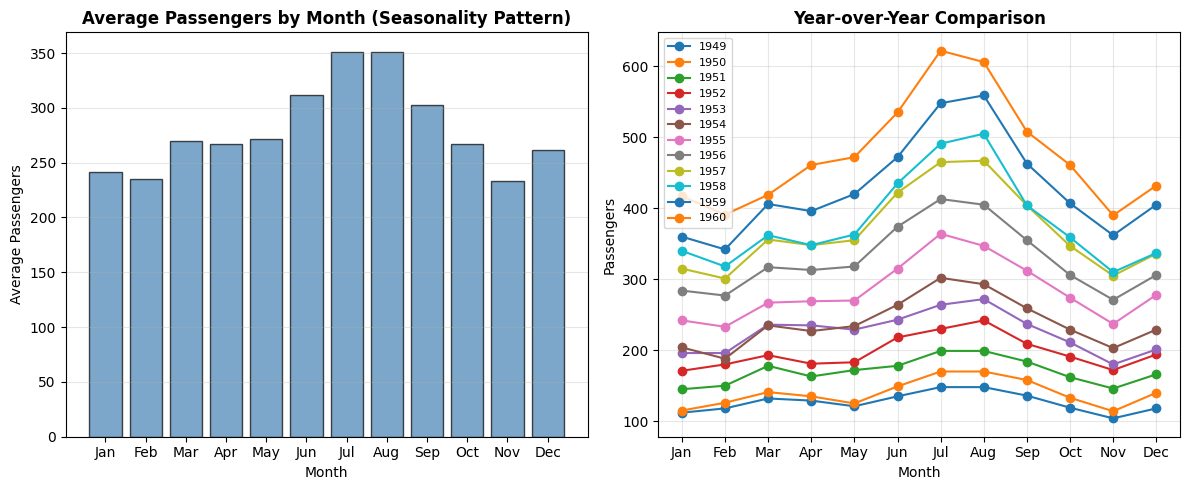

SEASONALITY FINDINGS:
Jan: 241.8 passengers (index: 86.2%)
Feb: 235.0 passengers (index: 83.8%)
Mar: 270.2 passengers (index: 96.4%)
Apr: 267.1 passengers (index: 95.3%)
May: 271.8 passengers (index: 97.0%)
Jun: 311.7 passengers (index: 111.2%)
Jul: 351.3 passengers (index: 125.3%)
Aug: 351.1 passengers (index: 125.3%)
Sep: 302.4 passengers (index: 107.9%)
Oct: 266.6 passengers (index: 95.1%)
Nov: 232.8 passengers (index: 83.1%)
Dec: 261.8 passengers (index: 93.4%)


In [5]:
# Monthly seasonality analysis
df['Month_of_Year'] = df['Month'].dt.month
monthly_avg = df.groupby('Month_of_Year')['Passengers'].mean()

plt.figure(figsize=(12, 5))

# Monthly pattern
plt.subplot(1, 2, 1)
plt.bar(monthly_avg.index, monthly_avg.values, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.title('Average Passengers by Month (Seasonality Pattern)', fontsize=12, fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3, axis='y')

# Year-over-year comparison
plt.subplot(1, 2, 2)
df['Year'] = df['Month'].dt.year
for year in df['Year'].unique():
    year_data = df[df['Year'] == year].reset_index(drop=True)
    plt.plot(range(1, 13), year_data['Passengers'].values[:12], marker='o', label=f'{year}')

plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Year-over-Year Comparison', fontsize=12, fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(fontsize=8, loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed findings
print("SEASONALITY FINDINGS:")
for month_num, month_name in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1):
    print(f"{month_name}: {monthly_avg[month_num]:.1f} passengers (index: {(monthly_avg[month_num]/monthly_avg.mean())*100:.1f}%)")

### Seasonal & Cyclical Patterns

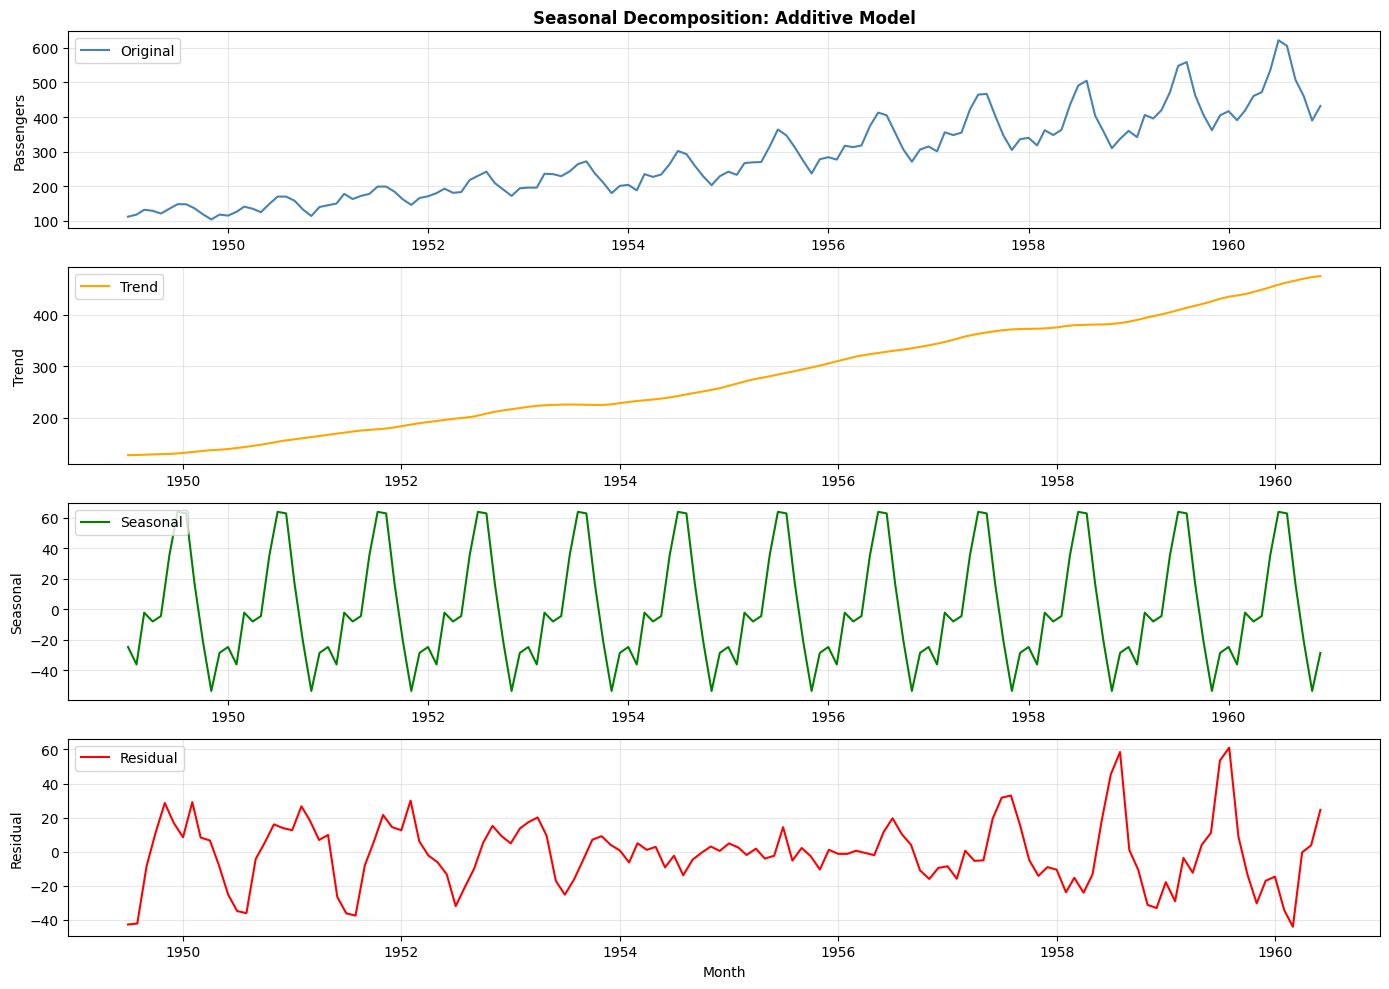

KEY OBSERVATIONS:
✓ Clear upward trend: Series increases from 112 to 432
✓ Strong seasonality: Seasonal component amplitude ≈ 36.3
✓ Seasonal period: 12 months (yearly cycle)
✓ Multiplicative effect: Variance increases with trend


In [6]:
# Extract trend using rolling average
df['Trend_MA12'] = df['Passengers'].rolling(window=12, center=True).mean()

# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

# Original
axes[0].plot(df['Month'], df['Passengers'], label='Original', color='steelblue')
axes[0].set_ylabel('Passengers')
axes[0].set_title('Seasonal Decomposition: Additive Model', fontsize=12, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(df['Month'], decomposition.trend, label='Trend', color='orange')
axes[1].set_ylabel('Trend')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(df['Month'], decomposition.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend(loc='upper left')
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(df['Month'], decomposition.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Month')
axes[3].legend(loc='upper left')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print observations
print("KEY OBSERVATIONS:")
print(f"✓ Clear upward trend: Series increases from {df['Passengers'].iloc[0]:.0f} to {df['Passengers'].iloc[-1]:.0f}")
print(f"✓ Strong seasonality: Seasonal component amplitude ≈ {decomposition.seasonal.std():.1f}")
print(f"✓ Seasonal period: 12 months (yearly cycle)")
print(f"✓ Multiplicative effect: Variance increases with trend")

### Trend & Seasonality Detection

Statistical Summary:
Mean: 280.30
Median: 265.50
Std Dev: 119.97
Min: 104, Max: 622
Skewness: 0.577
Kurtosis: -0.394
Coefficient of Variation: 0.428


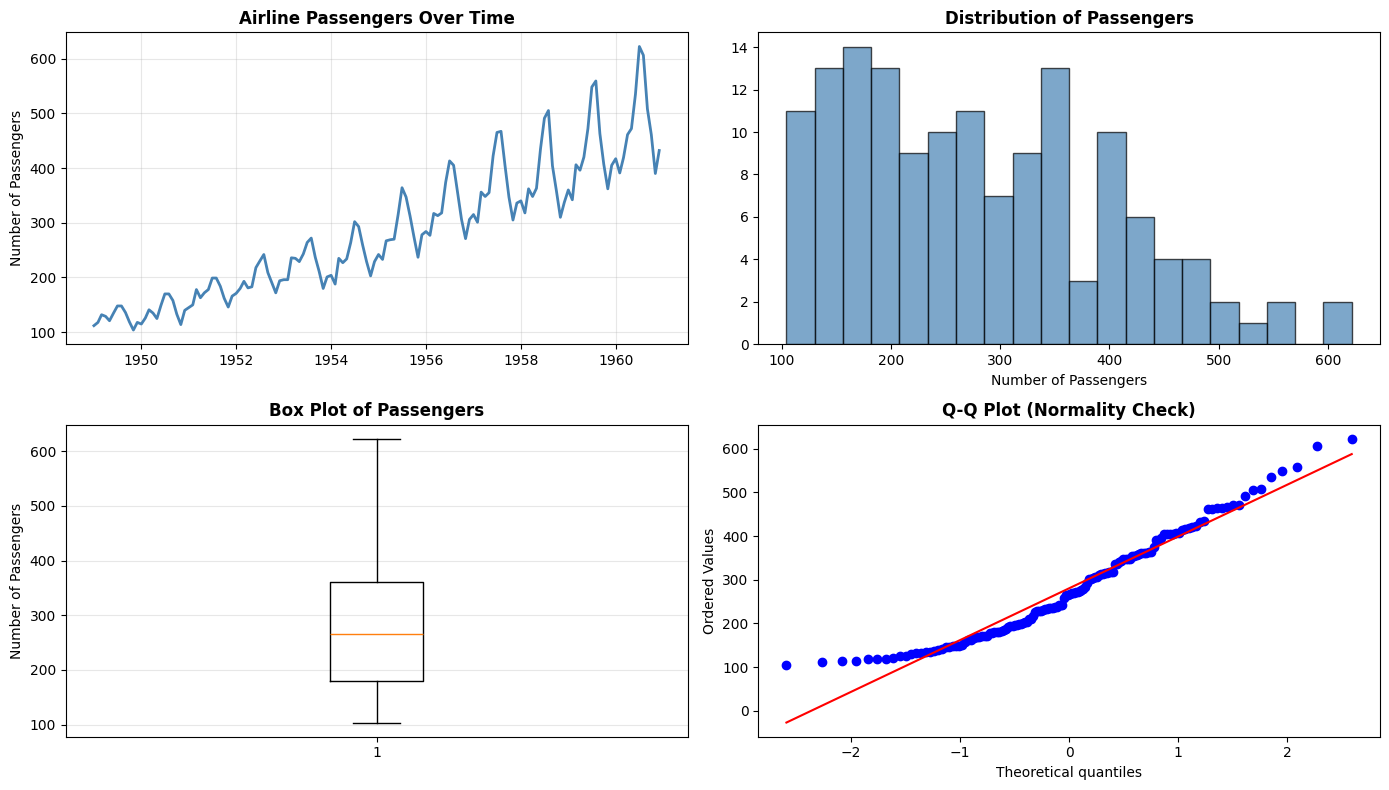

In [7]:
# Import scipy.stats for statistical functions
from scipy import stats

# Statistical properties
passengers = df['Passengers']
print("Statistical Summary:")
print(f"Mean: {passengers.mean():.2f}")
print(f"Median: {passengers.median():.2f}")
print(f"Std Dev: {passengers.std():.2f}")
print(f"Min: {passengers.min()}, Max: {passengers.max()}")
print(f"Skewness: {stats.skew(passengers):.3f}")
print(f"Kurtosis: {stats.kurtosis(passengers):.3f}")
print(f"Coefficient of Variation: {passengers.std() / passengers.mean():.3f}")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Time series plot
axes[0, 0].plot(df['Month'], df['Passengers'], linewidth=2, color='steelblue')
axes[0, 0].set_title('Airline Passengers Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Passengers')
axes[0, 0].grid(True, alpha=0.3)

# Histogram with KDE
axes[0, 1].hist(df['Passengers'], bins=20, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 1].set_title('Distribution of Passengers', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Passengers')

# Box plot
axes[1, 0].boxplot(df['Passengers'], vert=True)
axes[1, 0].set_title('Box Plot of Passengers', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Passengers')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Q-Q plot for normality
stats.probplot(df['Passengers'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### Univariate Analysis

In [8]:
# Check data quality
print("Missing values:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"\nData completeness: {(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.1f}%")

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values('Month')

# Time series frequency check
date_diffs = df['Month'].diff().dropna()
print(f"\nFrequency: {date_diffs.mode()[0]}")
print(f"Time span: {df['Month'].min()} to {df['Month'].max()}")

Missing values:
Month             0
Passengers        0
Month_of_Year     0
Year              0
Trend_MA12       11
dtype: int64

Duplicate rows: 0

Data completeness: 98.5%

Frequency: 31 days 00:00:00
Time span: 1949-01-01 00:00:00 to 1960-12-01 00:00:00


### Data Quality Assessment

In [9]:
# Dataset: Airline Passengers (classic time series)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

print("Dataset shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (144, 2)

First 10 rows:
     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
5  1949-06         135
6  1949-07         148
7  1949-08         148
8  1949-09         136
9  1949-10         119

Data types:
Month         object
Passengers     int64
dtype: object

Basic statistics:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


### Mini-Project: Comprehensive Dataset Exploration

**Objective:** Develop deep understanding of time series characteristics through hands-on EDA

#### Dataset Selection & Loading